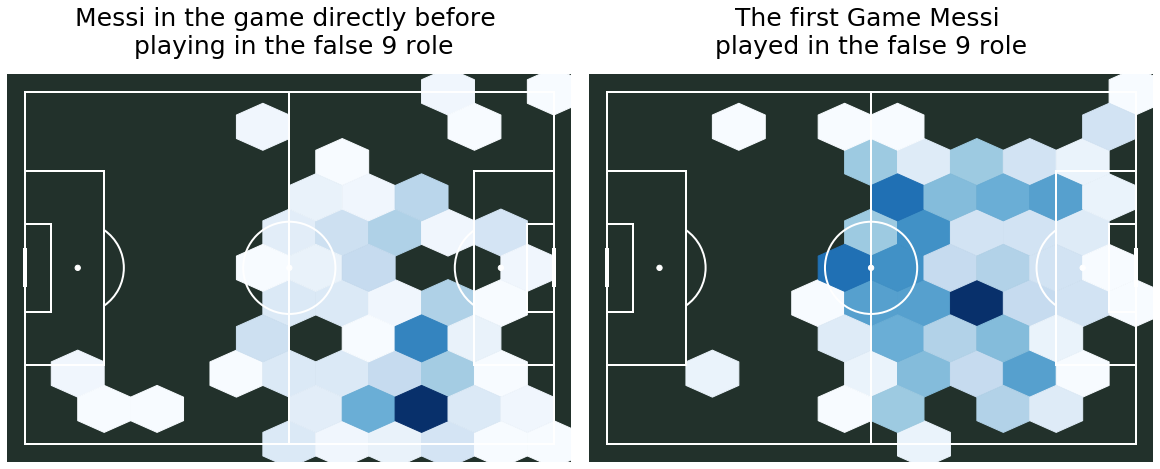

In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import os

# load first game that Messi played as a false-9 and the match before
kwargs = {'related_event_df': False,'shot_freeze_frame_df': False, 'tactics_lineup_df': False}
df_false9 = read_event(os.path.join(EVENT_SLUG,'69249.json'), **kwargs)['event']
df_before_false9 = read_event(os.path.join(EVENT_SLUG,'69251.json'), **kwargs)['event']

# filter messi's actions (starting positions)
df_false9 = df_false9.loc[df_false9.player_id == 5503,['x', 'y']]
df_before_false9 = df_before_false9.loc[df_before_false9.player_id == 5503,['x', 'y']]

# plotting
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), layout = (1, 2), pitch_color = '#22312b',
              stripe = False, line_zorder = 2)
fig, ax = pitch.draw()
pitch.hexbin(df_before_false9.x, df_before_false9.y, gridsize=10, ax = ax[0], cmap = 'Blues')
pitch.hexbin(df_false9.x, df_false9.y, gridsize=10, ax = ax[1], cmap = 'Blues')
ax[0].set_title('Messi in the game directly before \n playing in the false 9 role', fontsize = 25, pad = 20);
ax[1].set_title('The first Game Messi \nplayed in the false 9 role', fontsize = 25, pad = 20);
fig.savefig(os.path.join('figures', 'README_hexbin_example.png'), bbox_inches = 'tight')